In [5]:
%load_ext autoreload
%autoreload 2

import os
import sys
import math
from glob import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy.stats as stats

sys.path.append('..')

from src.data import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Constants
DATA_FOLDER = "../data/"

LOC_X = 200
LOC_Y = 200

In [7]:
# Load all the data we have for one location

def load_all_data(loc_x: int, loc_y: int):
    """Load all the data."""
    dict_data = {}
    for file_path in glob(os.path.join(DATA_FOLDER, "*.h5")):
        print(file_path)
        year = os.path.basename(file_path.split('_')[-1].split('.')[0])
        year_data = load_data(DATA_FOLDER, year)
        dict_data[year] = year_data[:, loc_x, loc_y]
    
    return np.concatenate([dict_data[x] for x in sorted(list(dict_data.keys()))])

location_data = load_all_data(LOC_X, LOC_Y)

../data\ghi_2005.h5
../data\ghi_2006.h5
../data\ghi_2007.h5
../data\ghi_2008.h5
../data\ghi_2009.h5
../data\ghi_2010.h5
../data\ghi_2011.h5
../data\ghi_2012.h5
../data\ghi_2013.h5
../data\ghi_2014.h5
../data\ghi_2015.h5
../data\ghi_2016.h5
../data\ghi_2017.h5
../data\ghi_2018.h5
../data\ghi_2019.h5
../data\ghi_2020.h5


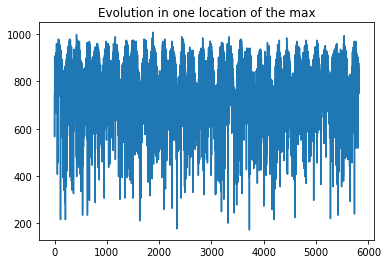

In [8]:
x = location_data.reshape((-1, 96)).max(axis=1)*1.2*4
x = x[x<1100]
pd.Series(x).plot.line(
    title="Evolution in one location of the max"
);